In [1]:
import sys
sys.path
from Utils import rul_utils
import warnings
warnings.filterwarnings("ignore")

In [2]:
import scipy
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load and process data

Text(0.5, 0, 'Op3')

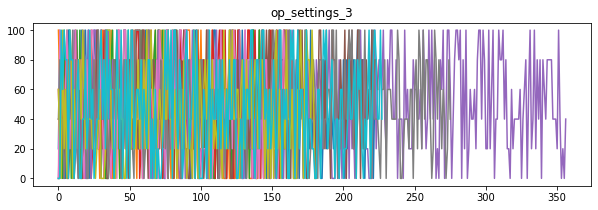

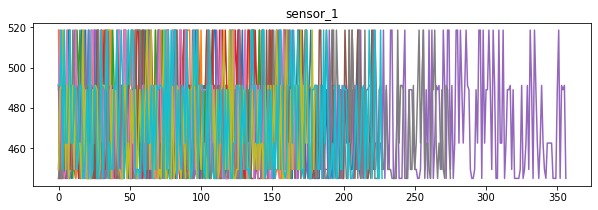

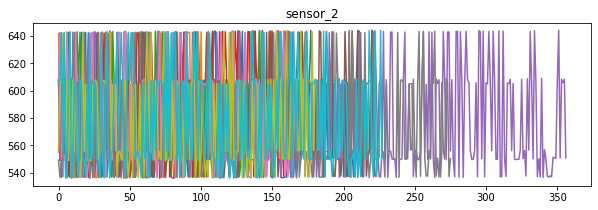

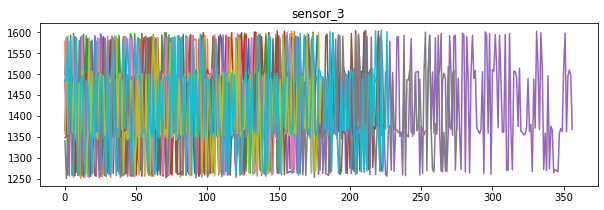

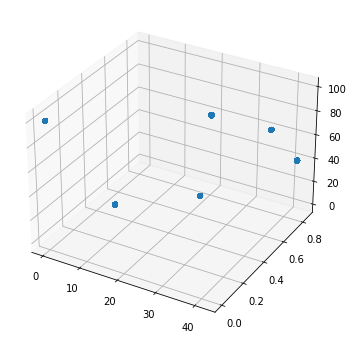

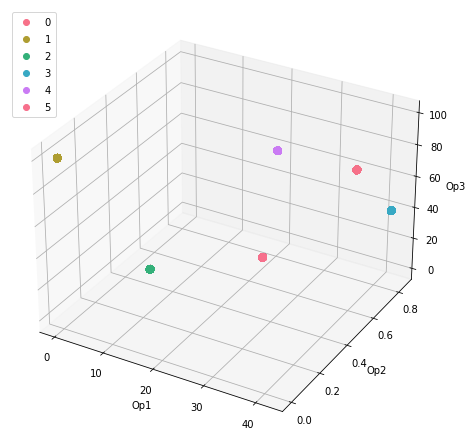

In [3]:
from turtle import update
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

data = pd.read_csv('Thuy/train.txt', delimiter = ' ', header=None)

updated_col_names = data.columns.values.tolist()
updated_col_names[0] = 'Unit'
updated_col_names[1] = 'Time'

condition_operations = ['op_settings_' + str(i-1) for i in updated_col_names[2:5]]
updated_col_names[2:5] = condition_operations

sensors = ['sensor_' + str(i-4) for i in updated_col_names[5:]]
updated_col_names[5:] = sensors

data.drop([26, 27],inplace=True, axis=1)

rename_dict = dict(zip(data.columns.values.tolist(), updated_col_names))
data = data.rename(columns = rename_dict)

data.head()

rul_utils.plot_samples(data, plot_cols=['op_settings_3', 'sensor_1', 'sensor_2', 'sensor_3'], plot_units=10)
                             
### Plot Clusters

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 2], data.iloc[:, 3], data.iloc[:, 4])

kmean= KMeans(6, n_init=5)
kmean.fit(data.iloc[:, 2:5])

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(data.iloc[:, 2], data.iloc[:, 3], data.iloc[:, 4], 
                s=50, c=kmean.labels_, marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), loc=2)

ax.set_xlabel('Op1')
ax.set_ylabel('Op2')
ax.set_zlabel('Op3')

# Data Preparation

In [4]:
data.loc[:, 'label'] = kmean.labels_
data.rename(columns={'Time': 'Timestep'}, inplace=True)
data

,Unit,Timestep,op_settings_1,op_settings_2,op_settings_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,label
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735,2
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619,1
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555,0
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832,5
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985,3
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741,3
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978,3
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761,0


In [5]:
data_valid = pd.read_csv('Thuy/test.txt', delimiter = ' ', header=None)

updated_col_names = data_valid.columns.values.tolist()
updated_col_names[0] = 'Unit'
updated_col_names[1] = 'Time'

condition_operations = ['op_settings_' + str(i-1) for i in updated_col_names[2:5]]
updated_col_names[2:5] = condition_operations

sensors = ['sensor_' + str(i-4) for i in updated_col_names[5:]]
updated_col_names[5:] = sensors

kmean.fit(data_valid.iloc[:, 2:5])

data_valid.drop([26, 27],inplace=True, axis=1)

rename_dict = dict(zip(data_valid.columns.values.tolist(), updated_col_names))
data_valid = data_valid.rename(columns = rename_dict)

data_valid.loc[:, 'label'] = kmean.labels_
data_valid.rename(columns={'Time': 'Timestep'}, inplace=True)

data_valid

,Unit,Timestep,op_settings_1,op_settings_2,op_settings_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,label
0,1,1,0.0016,0.0002,100.0,518.67,642.88,1587.21,1412.44,14.62,...,2388.10,8124.04,8.4363,0.03,393,2388,100.00,38.97,23.3029,3
1,1,2,24.9993,0.6215,80.0,462.54,536.45,1262.64,1055.44,7.05,...,2027.95,7865.20,10.8935,0.02,308,1915,84.93,14.29,8.6686,1
2,1,3,0.0004,0.0000,100.0,518.67,642.65,1589.75,1409.54,14.62,...,2388.19,8121.12,8.4620,0.03,393,2388,100.00,38.91,23.2693,3
3,1,4,10.0034,0.2500,20.0,489.05,604.44,1499.93,1315.34,10.52,...,2388.21,8123.53,8.6815,0.03,369,2319,100.00,28.60,17.0930,0
4,1,5,0.0024,0.0011,100.0,518.67,642.74,1585.47,1408.12,14.62,...,2388.13,8118.30,8.4617,0.03,392,2388,100.00,38.82,23.3124,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29815,218,86,35.0013,0.8404,60.0,449.44,556.14,1367.80,1129.58,5.48,...,2388.01,8065.66,9.3426,0.02,335,2223,100.00,14.62,8.8457,5
29816,218,87,25.0041,0.6200,80.0,462.54,536.97,1262.93,1051.83,7.05,...,2028.18,7871.94,10.9421,0.02,306,1915,84.93,14.41,8.4964,1
29817,218,88,20.0043,0.7000,0.0,491.19,607.93,1492.15,1252.99,9.35,...,2388.09,8059.65,9.2862,0.02,368,2324,100.00,24.42,14.5244,4
29818,218,89,20.0037,0.7000,0.0,491.19,607.85,1490.80,1254.70,9.35,...,2388.09,8062.13,9.2599,0.02,365,2324,100.00,24.45,14.5694,4


In [6]:
train_data = data.copy()
val_data = data_valid.copy()

# normalize
normalized_data = rul_utils.normalize_data(train_data, train_data.columns.values[5:-1])
val_normalized_data = rul_utils.normalize_data(val_data, val_data.columns.values[5:-1])

# Health Calculation

In [7]:
normalized_data_with_rul = rul_utils.cal_health_condition(normalized_data)
val_normalized_data_with_rul = rul_utils.cal_health_condition(val_normalized_data)

In [9]:
varNames = normalized_data_with_rul.columns.values
timeVariable = varNames[1]
conditionVariables = varNames[2:5]
dataVariables = varNames[5:-2]
timeVariable, conditionVariables, dataVariables

('Timestep',
 array(['op_settings_1', 'op_settings_2', 'op_settings_3'], dtype=object),
 array(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
        'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
        'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
        'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
        'sensor_21'], dtype=object))

In [10]:
slope_ranking = rul_utils.SlopeRanker(normalized_data_with_rul, dataVariables, 10)
slope_ranking_pd = pd.DataFrame(columns=['Sensor_id', 'Slope_value'])
slope_ranking_pd['Sensor_id'] = dataVariables
slope_ranking_pd['Slope_value'] = slope_ranking
slope_ranking_pd.sort_values(by = 'Slope_value', ascending=False, inplace=True)
slope_ranking_pd.reset_index(inplace=True)
slope_ranking_pd=slope_ranking_pd.iloc[:,1:]
slope_ranking_pd

,Sensor_id,Slope_value
0,sensor_11,0.013757
1,sensor_4,0.012803
2,sensor_15,0.012792
3,sensor_2,0.011418
4,sensor_17,0.011345
5,sensor_3,0.010521
6,sensor_12,0.010182
7,sensor_7,0.009076
8,sensor_20,0.008331
9,sensor_21,0.008144


# Data Fusion 

In [11]:
select_cols = slope_ranking_pd.head(8)['Sensor_id']
select_cols

0    sensor_11
1     sensor_4
2    sensor_15
3     sensor_2
4    sensor_17
5     sensor_3
6    sensor_12
7     sensor_7
Name: Sensor_id, dtype: object

In [12]:
X_train = normalized_data_with_rul[select_cols].copy()
y_train = normalized_data_with_rul['health_condition']

lr = LinearRegression()
lr.fit(X_train, y_train)

fused_Data = rul_utils.data_fusion(X_train, lr.coef_, train_data.Unit, train_data.Timestep, 20)

In [13]:
fused_Data

,health_indicator,Unit,Time,smooth_health_indicator
0,0.201318,1,1,1.000000
1,0.291881,1,2,0.990663
2,0.105424,1,3,0.988029
3,0.164638,1,4,0.987239
4,0.258251,1,5,0.975428
...,...,...,...,...
45913,-0.588117,218,129,0.429536
45914,-0.444083,218,130,0.427535
45915,-0.592907,218,131,0.424894
45916,-0.574881,218,132,0.421667


In [14]:
X_valid = val_normalized_data_with_rul[select_cols].copy()
y_valid = val_normalized_data_with_rul['health_condition']
val_fused_Data = rul_utils.data_fusion(X_valid, lr.coef_, val_data.Unit, val_data.Timestep,20)

In [15]:
val_fused_Data

,health_indicator,Unit,Time,smooth_health_indicator
0,-0.143603,1,1,1.000000
1,-0.136740,1,2,1.000267
2,-0.125061,1,3,0.994384
3,-0.094407,1,4,0.988555
4,-0.128447,1,5,0.986842
...,...,...,...,...
29815,-0.205461,218,86,0.827202
29816,-0.162382,218,87,0.829858
29817,-0.383293,218,88,0.833637
29818,-0.260054,218,89,0.827447


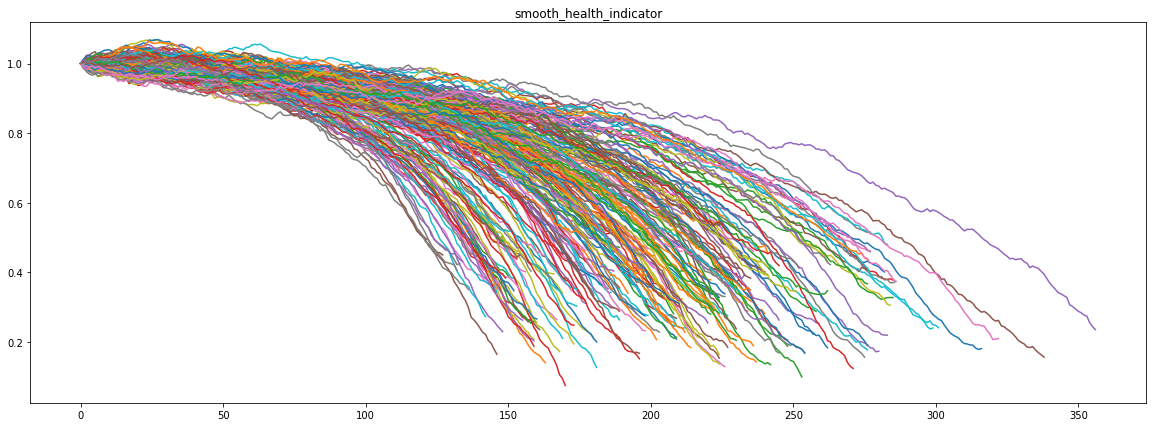

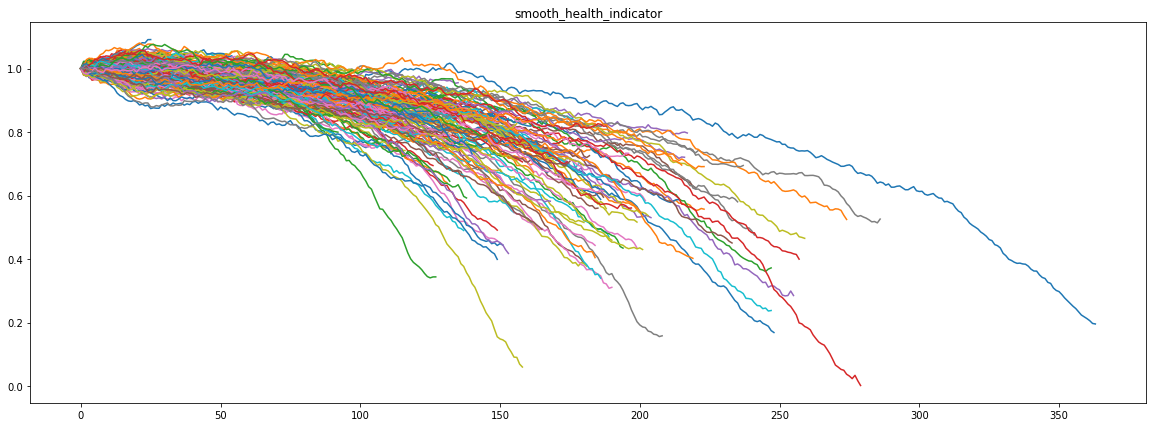

In [16]:
rul_utils.plot_samples(fused_Data, plot_cols=['smooth_health_indicator'], plot_units=len(fused_Data.Unit.unique()), figsize=(20, 7))
rul_utils.plot_samples(val_fused_Data, plot_cols=['smooth_health_indicator'], plot_units=len(val_fused_Data.Unit.unique()), figsize=(20, 7))

# Similarity based RUL model

In [17]:
health_indicator  = fused_Data[['Unit', 'Time', 'smooth_health_indicator']]

reg_model_lib = dict()
degree = 2
for unit in health_indicator['Unit'].unique():
    # get each unit data
    unit_data = health_indicator[health_indicator['Unit'] == unit]
    unit_data.reset_index(drop=True, inplace=True)
    
    #convert to poly feature with degree = 2
    X_poly = unit_data.Time
    y_poly = unit_data['smooth_health_indicator']
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_poly.values.reshape(-1,1))
    
    #fit poly line
    clf = LinearRegression()
    clf.fit(X_poly, y_poly)
    
    #save unit line to query dict
    reg_model_lib[unit] = clf

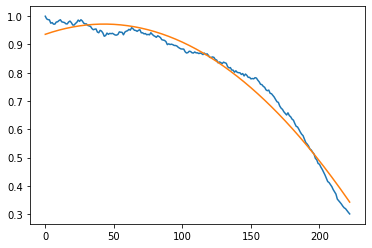

In [18]:
test_unit = 1

model = reg_model_lib[test_unit]
unit_data = health_indicator[health_indicator['Unit'] == test_unit]
unit_data.reset_index(drop=True, inplace=True)

X_poly = unit_data.Time
y_poly = unit_data['smooth_health_indicator']
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_poly.values.reshape(-1,1))

plt.plot(y_poly)
plt.plot(model.predict(X_poly))

In [21]:
loss_10, labels_10, pred_10 = rul_utils.predict(health_indicator, val_fused_Data, 0, reg_model_lib, break_point=10, NEIGHBORS_NUM=50)
loss_50, labels_50, pred_50 = rul_utils.predict(health_indicator, val_fused_Data, 0.5, reg_model_lib, break_point=0, NEIGHBORS_NUM=50)
loss_70, labels_70, pred_70 = rul_utils.predict(health_indicator, val_fused_Data, 0.7, reg_model_lib, break_point=0, NEIGHBORS_NUM=50)
loss_90, labels_90, pred_90 = rul_utils.predict(health_indicator, val_fused_Data, 0.9, reg_model_lib, break_point=0, NEIGHBORS_NUM=50)

In [22]:
loss_df = pd.DataFrame()
loss_df['True RUL 50'] = labels_50
loss_df['Pred RUL 50'] = pred_50
loss_df['Sample 50%'] = loss_50

loss_df['True RUL 70'] = labels_70
loss_df['Pred RUL 70'] = pred_70
loss_df['Sample 70%'] = loss_70

loss_df['True RUL 90'] = labels_90
loss_df['Pred RUL 90'] = pred_90
loss_df['Sample 90%'] = loss_90

loss_df['True RUL 10'] = labels_10
loss_df['Pred RUL 10'] = pred_10
loss_df['Sample 10'] = loss_10

loss_df

,True RUL 50,Pred RUL 50,Sample 50%,True RUL 70,Pred RUL 70,Sample 70%,True RUL 90,Pred RUL 90,Sample 90%,True RUL 10,Pred RUL 10,Sample 10
0,27,185.860360,158.860360,17,170.731231,153.731231,6,165.951952,159.951952,44,194.631131,150.631131
1,79,93.370871,14.370871,48,64.946947,16.946947,16,54.088589,38.088589,147,200.768769,53.768769
2,58,113.327828,55.327828,35,78.524024,43.524024,12,57.366366,45.366366,106,196.302803,90.302803
3,37,167.148649,130.148649,23,131.732733,108.732733,8,98.801802,90.801802,64,195.299800,131.299800
4,109,121.945946,12.945946,66,103.000000,37.000000,22,70.555556,48.555556,208,196.302803,11.697197
...,...,...,...,...,...,...,...,...,...,...,...,...
213,88,124.349850,36.349850,53,97.524024,44.524024,18,69.112112,51.112112,165,197.974474,32.974474
214,34,171.219219,137.219219,21,134.171171,113.171171,7,100.150150,93.150150,58,197.974474,139.974474
215,17,194.649149,177.649149,10,190.226727,180.226727,4,181.453954,177.453954,23,196.302803,173.302803
216,46,160.842342,114.842342,28,135.805305,107.805305,10,125.942943,115.942943,82,194.965465,112.965465
